In [1]:
import numpy as np
import matplotlib.pyplot as plt

fname = "../good-runs/filmino_x.txt"

data = np.loadtxt(fname)

In [2]:
len(data)

100

In [3]:
numpart = 24
dim = 2
box_size = 8

In [4]:
ini = 0
end = 0
data = data[ini:]

In [5]:
import numpy as np

def acf(data, h):
    means=np.mean(data, axis=0)
    numerator = np.sum((data[h:len(data)-1]-means) * (data[0:(len(data)-h-1)]-means))
    denominator = len(data[0]) * (len(data)-h)
    return numerator / denominator

def get_correls(data, step=1, stop=None):
    correls = []
    c0=1
    if stop is None:
        stop = (len(data) // step - 1)
        print(stop)
    for i in range(stop+1):
        a = acf(data, i*step)
        if len(correls)!=0:
            a/=c0
        else:
            c0=a
            a=1
        correls.append(a)
        # print([i*step, a])
    return correls


In [6]:
corr = get_correls(data, step=1)

99


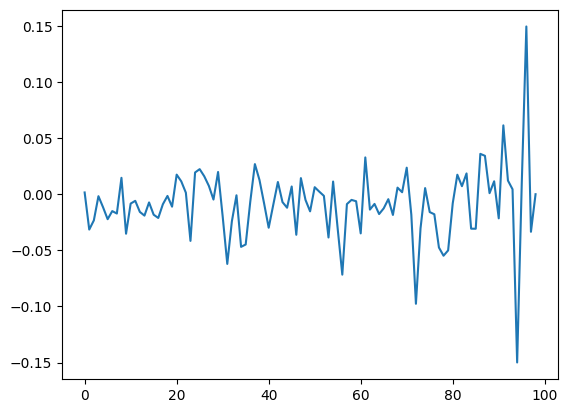

In [9]:
plt.plot(corr[1:])

MovieWriter imagemagick unavailable; using Pillow instead.


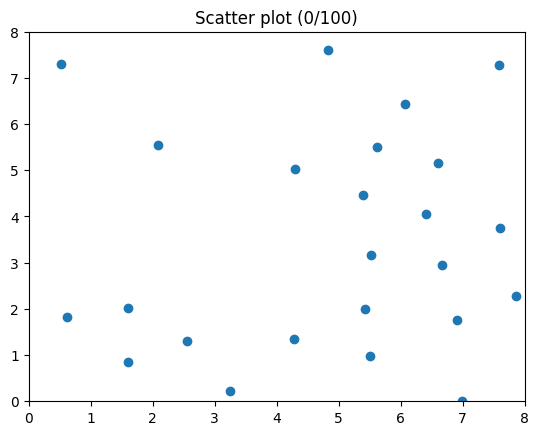

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axis objects
fig, ax = plt.subplots()

nframes = len(data)

# Define the animation function
def update(frame):
    ax.clear()
    ax.scatter(data[frame].reshape(numpart,dim)[:,0], data[frame].reshape(numpart,dim)[:,1])
    ax.set_title(f"Scatter plot ({frame}/{nframes})")
    ax.set_xlim(0,box_size)
    ax.set_ylim(0,box_size)

# Create the animation
animation = FuncAnimation(fig, update, frames=nframes, interval=300)

# Save the animation as a GIF
animation.save("scatter.gif", writer="imagemagick")
